In [1]:
%load_ext kedro.ipython

[04/19/24 00:40:03] INFO     Registered line magic '%reload_kedro'                                   ]8;id=16906;file:///opt/anaconda3/envs/genai/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=684904;file:///opt/anaconda3/envs/genai/lib/python3.10/site-packages/kedro/ipython/__init__.py#51\51]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=471388;file:///opt/anaconda3/envs/genai/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=519823;file:///opt/anaconda3/envs/genai/lib/python3.10/site-packages/kedro/ipython/__init__.py#53\53]8;;\

                    INFO     Resolved project path as:                                              ]8;id=519663;file:///opt/anaconda3/envs/genai/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=632788;file:///opt/anaconda3/envs/genai/lib/python3.10/site-packages/kedro/ipython/__init__.py#164\164]8;;\
                             /Users/wilsvenleong/Downloads/healthcare-chatbot.                                     
                             To set a different path, run '%reload_kedro <project_root>'                           

[04/19/24 00:40:05] INFO     Kedro project Healthcare Chatbot                                       ]8;id=221022;file:///opt/anaconda3/envs/genai/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=311997;file:///opt/anaconda3/envs/genai/lib/python3.10/site-packages/kedro/ipython/__init__.py#134\134]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=365314;file:///opt/anaconda3/envs/genai/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=370850;file:///opt/anaconda3/envs/genai/lib/python3.10/site-packages/kedro/ipython/__init__.py#135\135]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=435364;file:///opt/anaconda3/envs/genai/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=780090;file:///opt/anaconda3/envs/genai/lib/python3.10/site-packages/kedro/ipython/__init__.py#141\141]8;;\

In [2]:
import requests

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [3]:
catalog.list()


[
    'docs_dict',
    'pdfs_dict',
    'queries_file',
    'responses_file',
    'parameters',
    'params:websites',
    'params:pdfs_dir_path',
    'params:splitter',
    'params:splitter.chunk_size',
    'params:splitter.chunk_overlap',
    'params:splitter.separators',
    'params:embedding_model_name',
    'params:model_name',
    'params:temperature',
    'params:max_tokens',
    'params:api',
    'params:api.domain',
    'params:api.test_endpoint',
    'params:api.chat_endpoint',
    'params:vector_db',
    'params:vector_db.path',
    'params:vector_db.collection_name'
]

In [4]:
api_params = catalog.load("params:api")
api_params

[04/19/24 00:40:06] INFO     Loading data from params:api (MemoryDataset)...                    ]8;id=508407;file:///opt/anaconda3/envs/genai/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=616714;file:///opt/anaconda3/envs/genai/lib/python3.10/site-packages/kedro/io/data_catalog.py#483\483]8;;\

{'domain': 'http://127.0.0.1:8000', 'test_endpoint': '/', 'chat_endpoint': '/chat'}

In [5]:
domain = api_params["domain"]
test_endpoint = api_params["test_endpoint"]
chat_endpoint = api_params["chat_endpoint"]

test_url = domain + test_endpoint
chat_url = domain + chat_endpoint

print(test_url)
print(chat_url)

http://127.0.0.1:8000/
http://127.0.0.1:8000/chat


In [6]:
response = requests.get(test_url)
response.json()

{'response': 'Hello World!'}

In [7]:
queries_df = catalog.load("queries_file")
queries_df

                    INFO     Loading data from queries_file (CSVDataset)...                     ]8;id=508322;file:///opt/anaconda3/envs/genai/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=332224;file:///opt/anaconda3/envs/genai/lib/python3.10/site-packages/kedro/io/data_catalog.py#483\483]8;;\

,queries
0,What is gestational diabetes and how is it dia...
1,What are some healthy eating tips for people w...
2,How can my outpatient bill for diabetes be cov...
3,What is pre-diabetes and how does it differ fr...
4,What are the potential health risks associated...
...,...
232,"What are some tips for affordable, healthy gro..."
233,How can I involve my family in adopting health...
234,What resources are available for diabetes educ...
235,"How can I ensure I get high-quality, coordinat..."


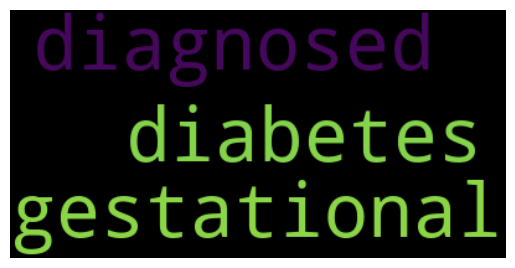

In [8]:
# Start with one query
query = queries_df.queries[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(query)

# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

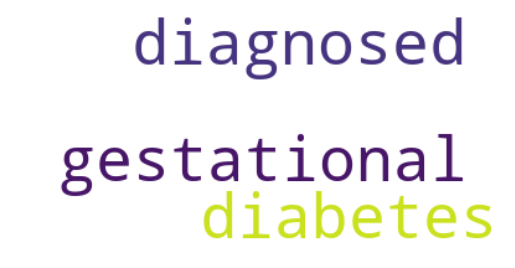

In [9]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(
    max_font_size=50, max_words=100, background_color="white"
).generate(query)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [10]:
queries = " ".join(query for query in queries_df.queries)
print(f"There are {len(queries)} words in the combination of all queries.")

There are 21381 words in the combination of all queries.


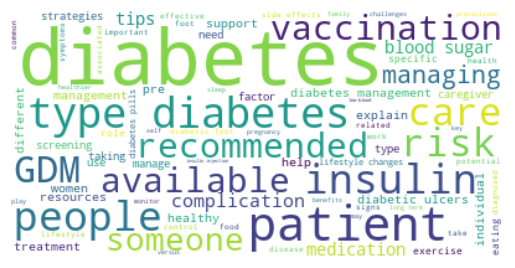

In [11]:
# Create stopword list
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(queries)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [12]:
response = requests.post(chat_url, json={"query": query})
response.json()


{
    'query': 'What is gestational diabetes and how is it diagnosed?',
    'response': 'Gestational diabetes (GDM) is diabetes that is diagnosed during the second or third trimester of pregnancy. It is often caused by underlying ß-cell dysfunction or insulin resistance worsened by decreased insulin sensitivity during pregnancy. GDM is more common in Eastern and Southeast Asian countries, with a prevalence of approximately 1 in 10. In Singapore, GDM occurs in around 1 in 4 to 5 pregnant women.   GDM can be diagnosed through glucose testing during pregnancy. If diabetes is first identified during pregnancy, it may represent undiagnosed pre-existing diabetes.',
    'source_documents': [
        {
            'page_content': '.1 2 3 Managing GDM to improve outcomesFirst published: 28 May 2018  Last updated: 22 August 2022 Women with diabetes during pregnancy (defined as  glucose levels higher than normal, including  diabetes, GDM, and pre-diabetes) are at increased risk  of maternal and 

In [13]:
# Unrelated question
response = requests.post(chat_url, json={"query": "Why is the sky blue?"})
response.json()


{
    'query': 'Why is the sky blue?',
    'response': "I'm sorry, I don't have information on why the sky is blue. If you have any other questions related to healthcare, I'd be happy to try and help!",
    'source_documents': [
        {
            'page_content': '.8',
            'metadata': {
                'page': 8,
                'source': 'data/01_raw/pdfs/acg-t2dm-personalising-medications.pdf'
            },
            'type': 'Document'
        },
        {
            'page_content': '.g., brisk walking) to release endorphins to lift your mood -Engage in relaxing hobbies •Having headaches (Your brain is most likely adapting to the increased level of oxygen) -Get enough sleep -Read or watch TV with adequate lighting •Coughing (Your lungs are starting to function properly again and are working to clear tar, dead cells and extra mucus accumulated from smoking)•Feeling irritable (Your brain is adjusting to a nicotine -free life)•Feeling tired (Nicotine is a stimulant that 

In [15]:
response.json()["source_documents"][0]


{
    'page_content': '.8',
    'metadata': {'page': 8, 'source': 'data/01_raw/pdfs/acg-t2dm-personalising-medications.pdf'},
    'type': 'Document'
}

In [16]:
response.status_code

201

In [18]:
queries_df["queries"].to_list()


[
    'What is gestational diabetes and how is it diagnosed?',
    'What are some healthy eating tips for people with diabetes?',
    'How can my outpatient bill for diabetes be covered?',
    'What is pre-diabetes and how does it differ from type 2 diabetes?',
    'What are the potential health risks associated with having pre-diabetes?',
    'How can lifestyle changes like diet and exercise help manage pre-diabetes?',
    'What specific dietary recommendations are given for someone with pre-diabetes?',
    'Under what circumstances might medication be recommended for pre-diabetes, and what medication is typically used?',
    'How often should someone with pre-diabetes get follow-up testing or screening done?',
    'What tips or strategies are suggested for sustaining healthy lifestyle changes long-term for pre-diabetes?',
    'What are the different types of oral medications available for treating diabetes?',
    'Is there anything I should tell my doctor before taking anti-diabetes